# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
import sklearn
print 'sklearn version', sklearn.__version__

Wholesale customers dataset has 440 samples with 6 features each.
sklearn version 0.18.1


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
import seaborn as sns
print 'columns', data.columns
print 'data.size', data.size
print 'len(data)', len(data)

columns Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')
data.size 2640
len(data) 440


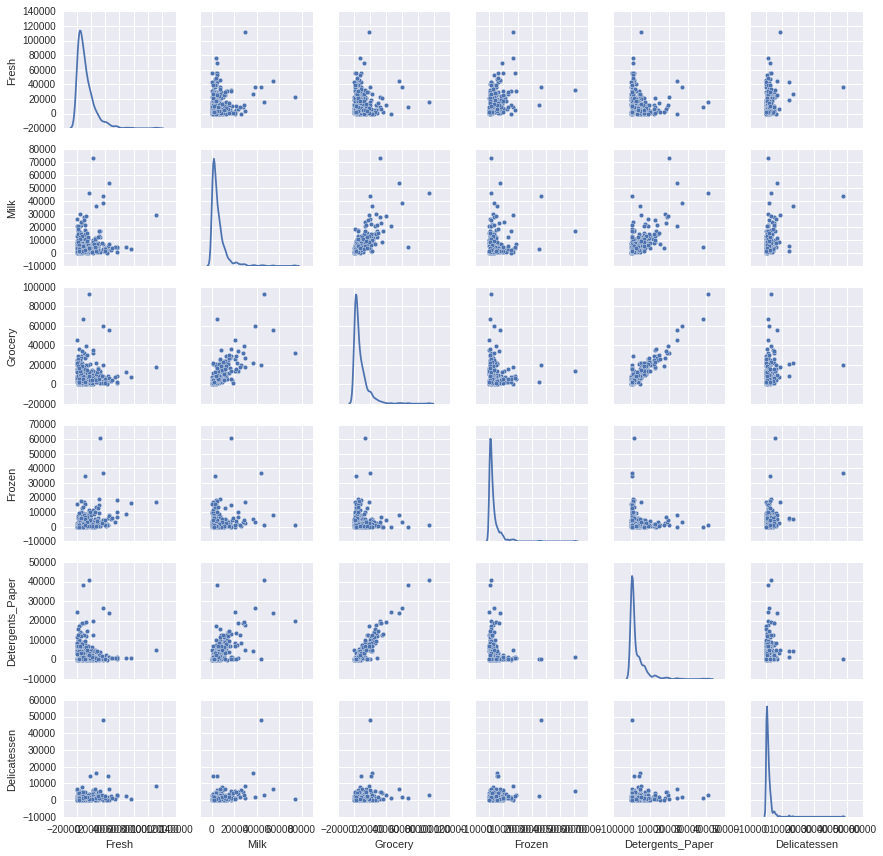

In [4]:
sns.pairplot(data, hue=None, diag_kind='kde', size=2);

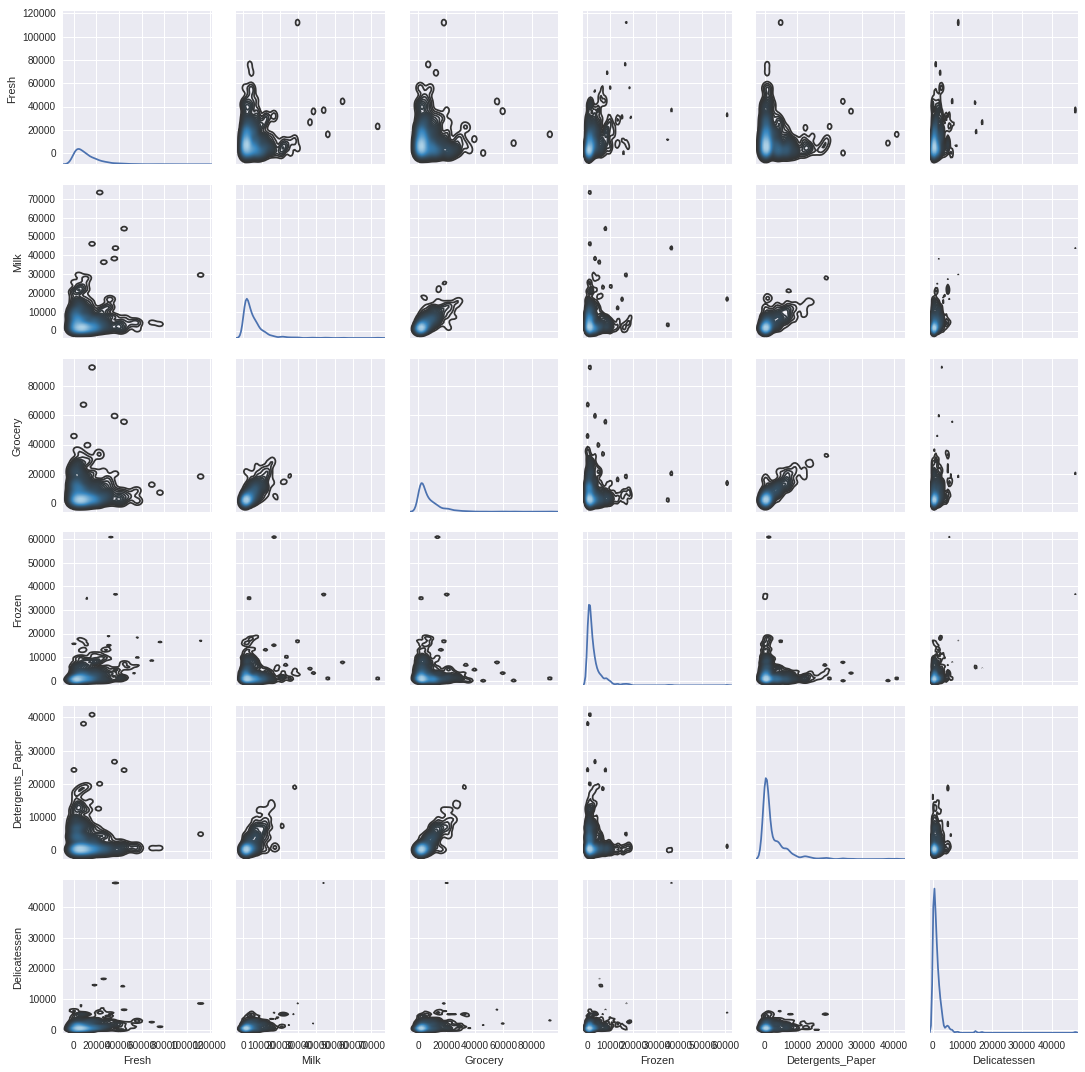

In [5]:
g = sns.PairGrid(data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=120);

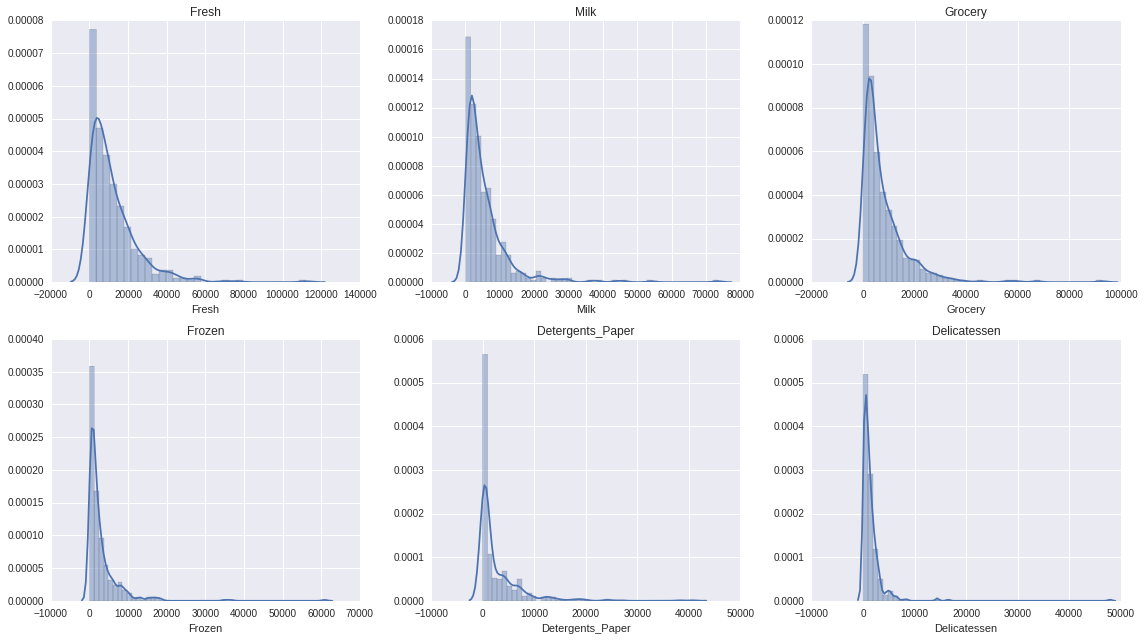

In [7]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(2, len(data.columns)/2, figsize=(16, 9))
ashes = axes.ravel()
for k, topic in enumerate(data.columns):
    ax = ashes[k]
    ax.set_title(topic)
    sns.distplot(data[topic], ax=ax)
plt.tight_layout();

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [8]:
# TODO: Select three indices of your choice you wish to sample from the dataset
#indices = [10, 25, 67, 100, 125, 175, 200, 250, 275, 300, 350, 439]
indices = [10, 200, 350]
#outlier_indices [128, 65, 154, 66, 75]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop=True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,3067,13240,23127,3941,9959,731
2,3521,1099,1997,1796,173,995


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** It has not been specified what are the units for the columns. In the following I am going to assume the unit is the currency of Portugal (Euro). 

*Establishment 0 (10)*

the purchases are quite balanced and high across the six categories -- I think that pattern could correspond to a retail store
    
*Establishment 2 (100)*

large purchases across the six categories -- a retail store or a market

*Establishment 4 (275)*

The Fresh category dominates, with Grocery and Frozen at aroun 60% -- I would not be surprised if the establishment was a restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
 - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [10]:
# Here we are setting random_state variable that we are going to use throughout the analysis.
# It will allow for the numerical reproducibility of the analysis results.
random_state = 28

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
#
# Instead of selecting one category, I am going to run such analysis for all of the features one by one.
# We will look at both Linear and DecisionTree regression results
#
if sklearn.__version__ < 18:
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
for category in data.columns:
    print 'category %s' % category
    new_data = data.drop([category], axis=1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test =\
    train_test_split(new_data, data[category], test_size=0.25, random_state=random_state)

    # TODO: Create a decision tree regressor and fit it to the training set
    linear_regressor = LinearRegression() 
    tree_regressor = DecisionTreeRegressor(random_state=random_state, min_samples_leaf=7)
    linear_regressor.fit(X_train, y_train.values)
    tree_regressor.fit(X_train, y_train.values)
    # TODO: Report the score of the prediction using the testing set
    tree_train_score = tree_regressor.score(X_train, y_train.values)
    tree_test_score = tree_regressor.score(X_test, y_test.values)
    linear_train_score = linear_regressor.score(X_train, y_train.values)
    linear_test_score = linear_regressor.score(X_test, y_test.values)
    print 'train_score (linear, tree) %.4f %.4f' % (linear_train_score, tree_train_score)
    print 'test_score (linear, tree) %.4f %.4f' % (linear_test_score, tree_test_score)
    print

category Fresh
train_score (linear, tree) 0.1499 0.5249
test_score (linear, tree) 0.0666 0.0551

category Milk
train_score (linear, tree) 0.6444 0.7035
test_score (linear, tree) 0.5012 0.4430

category Grocery
train_score (linear, tree) 0.8848 0.7895
test_score (linear, tree) 0.8733 0.7117

category Frozen
train_score (linear, tree) 0.2942 0.4847
test_score (linear, tree) 0.1672 0.1819

category Detergents_Paper
train_score (linear, tree) 0.8672 0.8129
test_score (linear, tree) 0.8940 0.7774

category Delicatessen
train_score (linear, tree) 0.4427 0.3559
test_score (linear, tree) -2.5974 -0.9399



### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I have attempted to predict all off the individual features as a function of the rest. I have used both linear model regressor (LinearRegression) and the decision tree reggressor (DecisionTreeRegressor). The default settings of the DecisionTreeRegressor lead systematically to overfitting -- I have rectified the DecisionTree regressor overfitting problem by modifying the min_sample_leaf attribute.

The features that we have the best chance to predict based on values of the rest of the features are "Grocery" and "Detergents_Paper" with test R^2 above 0.85.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

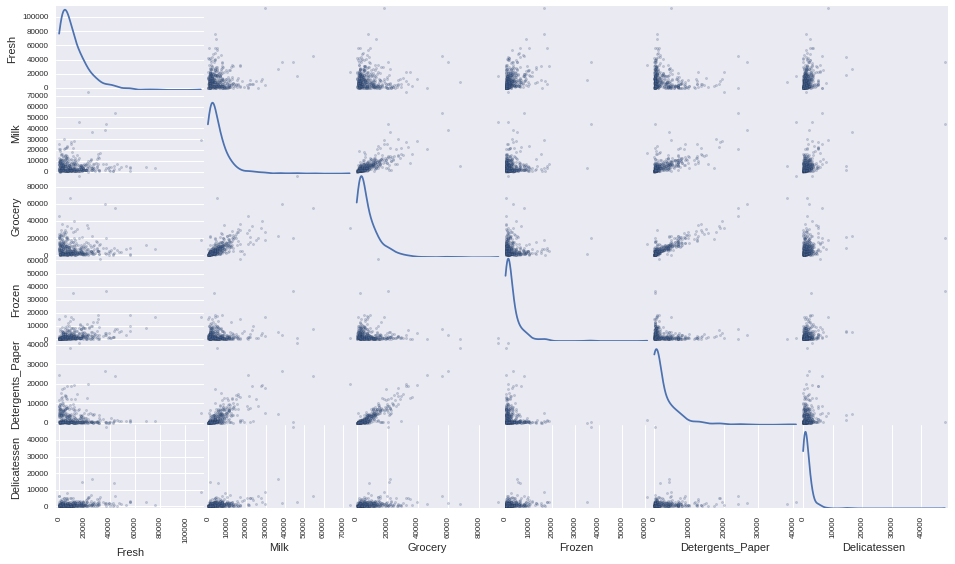

In [11]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha=0.3, figsize=(16, 9), diagonal='kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** There is a notable linear relationship between three pairs of categories: Grocery vs. Detergents_Paper, Grocery vs. Milk and Detergents_Paper vs. Milk. This is interesting as both "Grocery" and "Detergents_Paper" are the easiest to predict based on the values of the rest of the categories. It also indicates that the "Milk" category has significant predictive power for both Grocery and Detergents_Paper values.

I will still keep all of the features for further analysis as the R^2 tops below 0.9. None of the features can be perfectly explained by the rest. 

The distribution plot for those features as well as all of the rest does not follow the normal distribution -- the great majority of the datapoints are concentrated near the origin.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

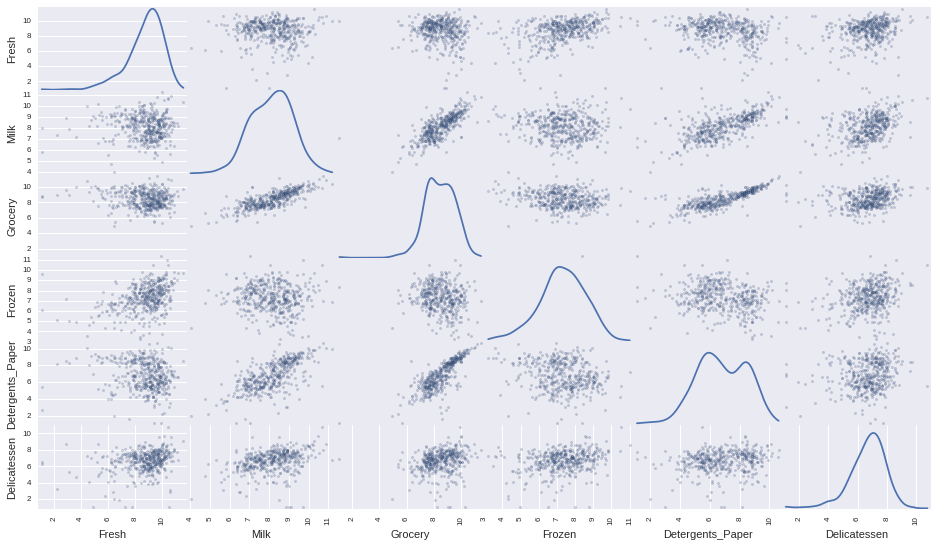

In [12]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha=0.3, figsize=(16, 9), diagonal='kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

**Comment** Indeed the distribution for all individual categories appears much closer to a normal distribution after applying the logarithm. In the case of Detergents_Paper and Grocery categories there is notable bump suggesting a mix of at least two normal distributions.

In [13]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,8.166500,7.002156,7.599401,7.493317,5.153292,6.902743


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [14]:
print log_data.keys()

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')


In [15]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [16]:
# For each feature find the data points with extreme high or low values
candidate_outliers = {}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers)
    print "Data points considered outliers for the feature '{}'".format(feature)
    print "25% '{:.2f}', 75% '{:.2f}', step '{:.2f}'".format(Q1, Q3, step)
    outs = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outs)
    candidate_outliers[feature] = outs.index
print candidate_outliers
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop=True)

Data points considered outliers for the feature 'Fresh'
25% '8.05', 75% '9.74', step '2.53'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk'
25% '7.33', 75% '8.88', step '2.32'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery'
25% '7.67', 75% '9.27', step '2.40'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen'
25% '6.61', 75% '8.18', step '2.35'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper'
25% '5.55', 75% '8.27', step '4.09'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen'
25% '6.01', 75% '7.51', step '2.24'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


{'Grocery': Int64Index([75, 154], dtype='int64'), 'Frozen': Int64Index([38, 57, 65, 145, 175, 264, 325, 420, 429, 439], dtype='int64'), 'Delicatessen': Int64Index([66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289,
            343],
           dtype='int64'), 'Detergents_Paper': Int64Index([75, 161], dtype='int64'), 'Fresh': Int64Index([65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355,
            357, 412],
           dtype='int64'), 'Milk': Int64Index([86, 98, 154, 356], dtype='int64')}


In [17]:
# Find establishments that pop out as outliers in multiple categories
all_indices = []
for key in candidate_outliers:
    all_indices += list(candidate_outliers[key])
print 'candidate outliers', set(all_indices)
print
outlier_categories = {}
for idx in set(all_indices):
    categories = []
    for key in candidate_outliers:
        if idx in candidate_outliers[key]:
            categories.append(key)
    outlier_categories[idx] = categories

print 'outlier_categories'
print outlier_categories
print 
outlier_indices = []
for idx in outlier_categories:
    if len(outlier_categories[idx]) > 1:
        print idx, outlier_categories[idx]
        outlier_indices.append(idx)
print 'outlier_indices', outlier_indices
outs = pd.DataFrame(data.loc[outlier_indices], columns = data.keys())
display(outs);


candidate outliers set([128, 193, 264, 137, 142, 145, 154, 412, 285, 289, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 75, 325, 161, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183])

outlier_categories
{128: ['Delicatessen', 'Fresh'], 65: ['Frozen', 'Fresh'], 264: ['Frozen'], 137: ['Delicatessen'], 142: ['Delicatessen'], 145: ['Frozen'], 154: ['Grocery', 'Delicatessen', 'Milk'], 412: ['Fresh'], 285: ['Delicatessen'], 289: ['Delicatessen'], 420: ['Frozen'], 38: ['Frozen'], 171: ['Fresh'], 429: ['Frozen'], 175: ['Frozen'], 304: ['Fresh'], 305: ['Fresh'], 439: ['Frozen'], 184: ['Delicatessen'], 57: ['Frozen'], 187: ['Delicatessen'], 193: ['Fresh'], 66: ['Delicatessen', 'Fresh'], 203: ['Delicatessen'], 325: ['Frozen'], 161: ['Detergents_Paper'], 75: ['Grocery', 'Detergents_Paper'], 81: ['Fresh'], 338: ['Fresh'], 86: ['Milk'], 343: ['Delicatessen'], 218: ['Fresh'], 95: ['Fresh'], 96: ['Fresh'], 353: ['Fresh'], 98: ['Milk'], 355: ['Fresh'], 356: ['M

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,140,8847,3823,142,1062,3
65,85,20959,45828,36,24231,1423
154,622,55,137,75,7,8
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** We have found 5 establishments that pop up as an outlier in more then one category:

    `128 ['Delicatessen', 'Fresh']`
    `65 ['Frozen', 'Fresh']`
    `154 ['Grocery', 'Delicatessen', 'Milk']`
    `66 ['Delicatessen', 'Fresh']`
    `75 ['Grocery', 'Detergents_Paper']`
    
However, considering the size and nature of the dataset, their presence is unlikely to affect the results of the analysis significantly and I prefer to keep them for further analysis.

From the more general perspective I feel strongly that all of the customers are important, therefore I would not like to remove any of them from the dataset at this point. Some of the outliers may be the most valuable customers and they may warrant the trouble of treating them as a class of its own.

    

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

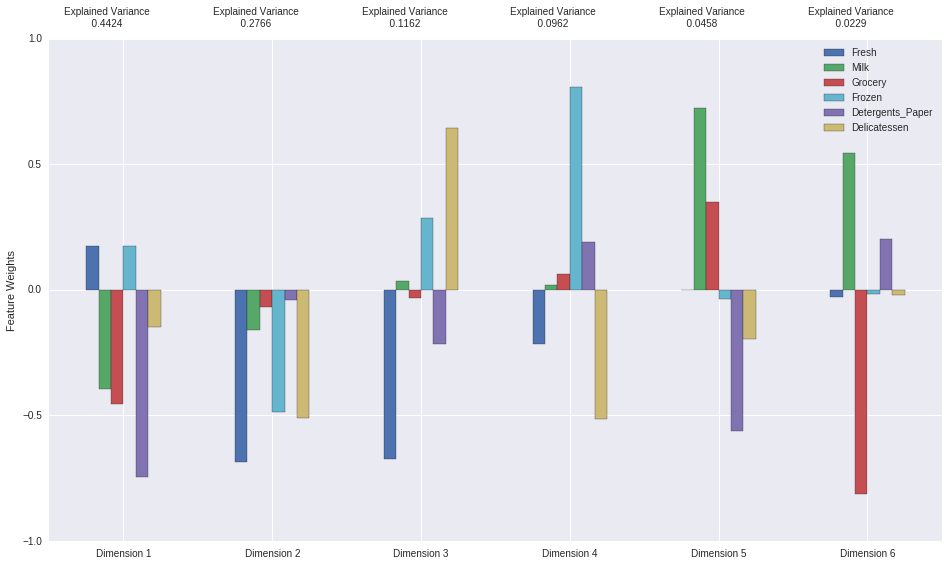

In [22]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=good_data.shape[1], svd_solver='full', random_state=random_state)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

**Note**: After upgrading sklearn to version 18.1 the sign of the bars flipped. I did not yet find a way to control this behavior using sklearn API.

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

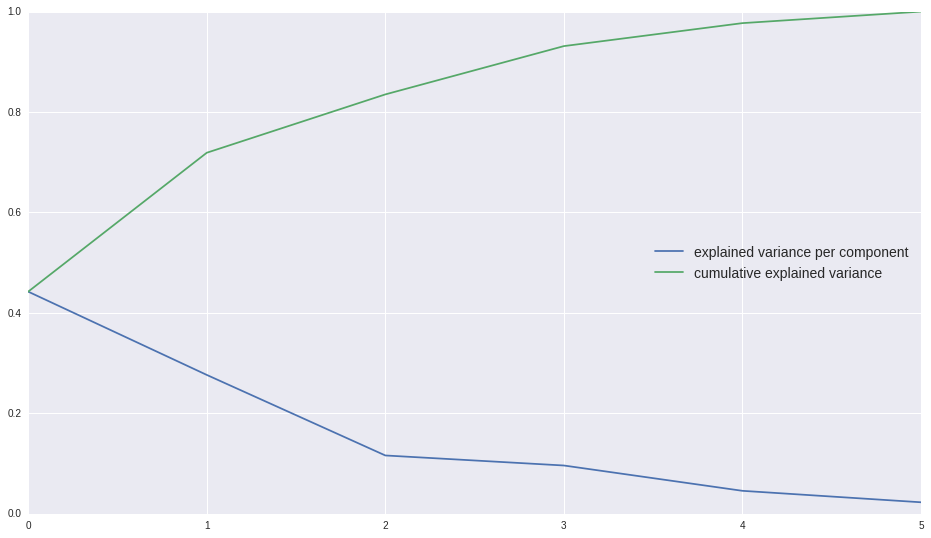

In [200]:
ev = pca.explained_variance_ratio_

plt.figure(figsize=(16,9))
plt.plot(ev, label='explained variance per component')
plt.plot(np.cumsum(ev), label='cumulative explained variance')
plt.legend(loc=7, fontsize=14);

In [201]:
for k, e in enumerate(ev):
    print 'explained variance %d: %.4f, cumulative %d: %.4f' % (k+1, e, k+1, ev[:k+1].sum())

explained variance 1: 0.4424, cumulative 1: 0.4424
explained variance 2: 0.2766, cumulative 2: 0.7189
explained variance 3: 0.1162, cumulative 3: 0.8351
explained variance 4: 0.0962, cumulative 4: 0.9313
explained variance 5: 0.0458, cumulative 5: 0.9771
explained variance 6: 0.0229, cumulative 6: 1.0000


**Answer:** The total variance explained by the first two components is 0.72. This number increases to 0.93 when including the first four components.

Regarding the interpretation of the first four components in terms of customer spending, using the visualization above, we see that the first component indicates average spending in the categories: Milk, Grocery and Detergents_Paper, while the second component reflects average spending in the other three categories: Fresh, Frozen and Delicatessen. The third component is strongly correlated with spending in Fresh category and similarly strogly corelated, but in the opposite direction, with spending in the Delicatessen category. The fourth component is mostly dependent on spending in the Frozen category while corellated in the opposite sense with spending in Fresh and Delicatessend categories.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [23]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.1162,-0.7488,0.8007,1.0355,-0.5710,-0.2135
1,-3.0182,-0.3952,0.1711,1.5640,0.1637,-0.0694
2,1.9406,0.4803,0.9341,-0.2318,-0.2337,-0.2453


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [24]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [25]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.1162,-0.7488
1,-3.0182,-0.3952
2,1.9406,0.4803


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

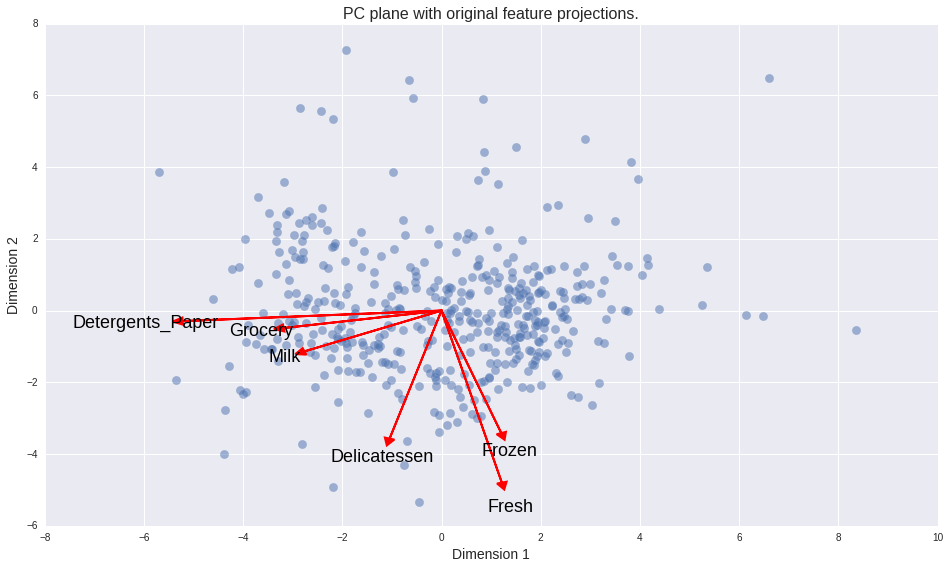

In [26]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point in the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-Means is simple, general purpose, hill-climbing algorithm. It scales well with number of samples. It works well in practice provided the number of clusters is not excessive [[ref]](http://scikit-learn.org/stable/modules/clustering.html). Gaussian Mixture Model is more expressive providing probabilities for samples belonging to different distribution (clusters), but is also computationally more expensive.

I will attempt analysis with both algorithms and choose which one to use depending on which performs better. In case both perform equally well I will stick to KMeans because it is simpler and runs faster.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
 - Assign the silhouette score to `score` and print the result.

In [27]:
reduced_data.shape


(440, 2)

In [29]:
import sklearn
print sklearn.__version__
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
#MeanShift, AgglomerativeClustering, linkage_tree, hierarchical
silhouette_scores = []
print 'n_components   KMeans        GaussianMixture'
for k in range(2, 10):
    print k,
    s = [k]
    for l, method in enumerate([KMeans, GaussianMixture]):
        # TODO: Apply your clustering algorithm of choice to the reduced data 
        if l==0:
            clusterer = method(n_clusters=k, random_state=random_state)
        if l==1:
            clusterer = method(n_components=k, random_state=random_state)
        clusterer.fit(reduced_data)

        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data) 

        # TODO: Find the cluster centers
        if l == 0:
            centers = clusterer.cluster_centers_
        if l ==1:
            centers = clusterer.means_
        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)

        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, preds)
        s.append(score)
        print '%18.3f' % score,
    silhouette_scores.append(s)
    print 

0.18.1
n_components   KMeans        GaussianMixture
2              0.419              0.410
3              0.392              0.412
4              0.330              0.361
5              0.351              0.313
6              0.360              0.299
7              0.366              0.326
8              0.344              0.329
9              0.352              0.292


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

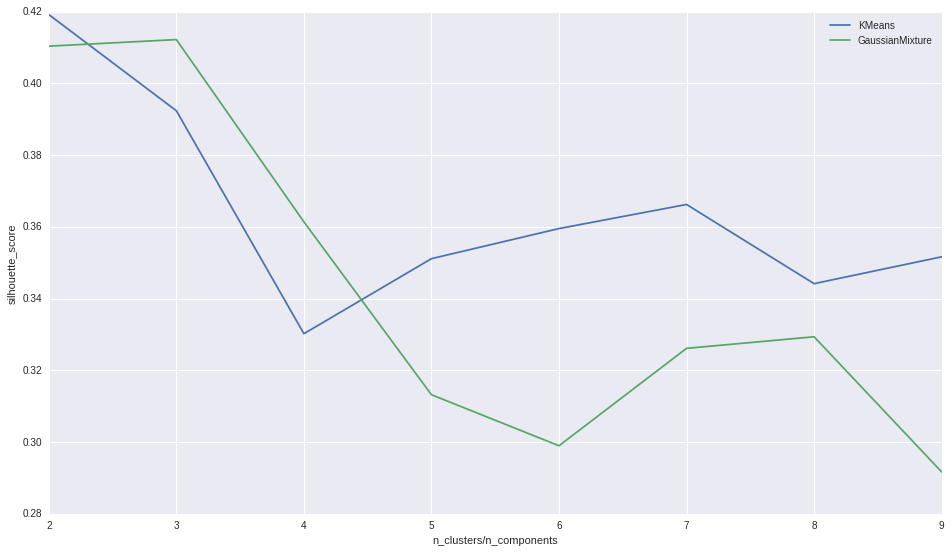

In [208]:
silhouette_scores = np.array(silhouette_scores)
plt.figure(figsize=(16, 9))
plt.plot(silhouette_scores[:, 0], silhouette_scores[:, 1], label='KMeans')
plt.plot(silhouette_scores[:, 0], silhouette_scores[:, 2], label='GaussianMixture')
plt.xlabel('n_clusters/n_components')
plt.ylabel('silhouette_score')
plt.legend(loc='best');

**Answer:** The best silhouette score, 0.419, was observed for `n_clusters = 2` with KMeans clusturing. In the case of GaussianMixture clustering, the best score of 0.412 was observed with `n_components = 3`. 

The results and scores obtained by the two algorithms are similar for different number of clusters. Although Gaussian Mixture algorithm typically shows optimum for `n_components = 3`, the score is only marginally better then the score obtained for `n_components = 2` with the same algorithm.

Since none of the algorithm outperforms the other significantly, and given the marginally better silhouette score obtained with KMeans we are going to use KMeans algorithm in the rest of the clustering analysis.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [30]:
#KMeans
clusterer = KMeans(n_clusters=2, random_state=random_state)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data) 
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

# GaussianMixture
#clusterer = GaussianMixture(n_components=3, random_state=random_state)
#clusterer.fit(reduced_data)
#preds = clusterer.predict(reduced_data) 
#centers = clusterer.means_
#sample_preds = clusterer.predict(pca_samples)
#score = silhouette_score(reduced_data, preds)

import visuals as vs

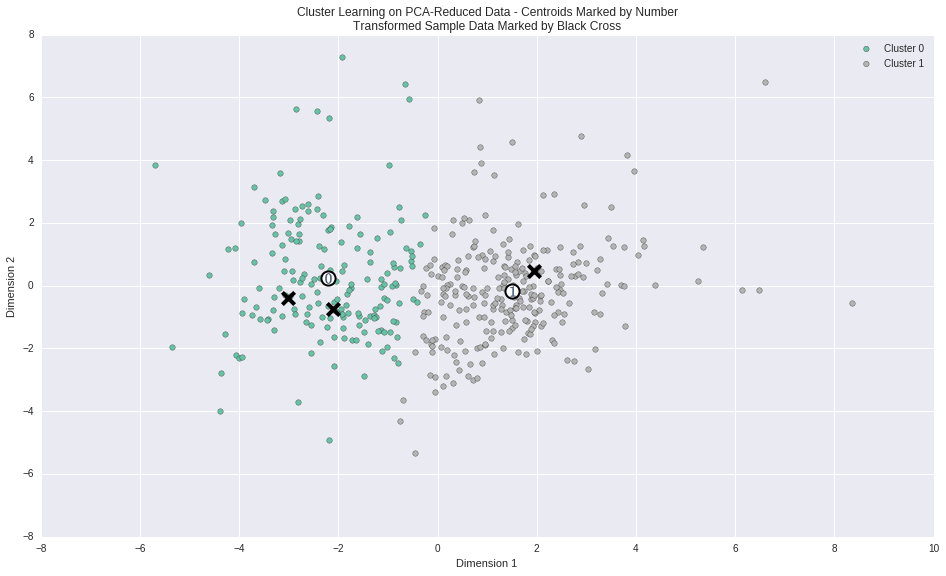

In [31]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [32]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments

display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3570,7749,12463,900,4567,966
Segment 1,8994,1909,2366,2081,290,681


In [33]:
# Let's have look at how much in total thecustomers in the two segments spend on average
print true_centers
print
sums = true_centers.sum(axis=1)
print 'Totals in segments'
print sums
print 'relative spending in segments', sums['Segment 0'], sums['Segment 1']
print 'Segment 0'
print true_centers.ix[0]/sums['Segment 0']
print 'Segment 1'
print true_centers.ix[1]/sums['Segment 1']

#print true_centers.data/true_centers.sum(axis=1).data

           Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   3570  7749    12463     900              4567           966
Segment 1   8994  1909     2366    2081               290           681

Totals in segments
Segment 0    30215
Segment 1    16321
dtype: float64
relative spending in segments 30215.0 16321.0
Segment 0
Fresh               0.118153
Milk                0.256462
Grocery             0.412477
Frozen              0.029787
Detergents_Paper    0.151150
Delicatessen        0.031971
Name: Segment 0, dtype: float64
Segment 1
Fresh               0.551069
Milk                0.116966
Grocery             0.144967
Frozen              0.127504
Detergents_Paper    0.017769
Delicatessen        0.041725
Name: Segment 1, dtype: float64


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** 

Customers in Segment 0 spend on average in total 30215 monetary units, compared to 16321 for customers in Segment 1. 

Customers in Segment 1 spend more then half of the their total spending on the Fresh category compared to only one tenth of the total for customers in Segment 2. 

Customers in segment Segment 1 spend on the other hand significantly more on Detergents_Paper category where they spend where they spend almost 9 times the amount of the Segment 0 customers in relative terms. 

The Grocery category also shows quite different values when comparing the two segments with relative spending almost 3 times as large for customers in Segment 0 on average.

Given the relative and total spending of the two segments of our customers, it seems that Segment 0 corresponds to larger general purpose stores, while Segment 1 customers are smaller establishments like e.g. restaurants. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [34]:
# Display the predictions
display(samples)
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,3067,13240,23127,3941,9959,731
2,3521,1099,1997,1796,173,995


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:** Sample point 0 and 1 are predicted to belong to cluster 0 (Segment 0) and sample point 3 is predicted to predict to cluster 1 (Segment 1). Although the spending in Fresh category is very similar between the three points spending in Grocery and Detergents_Paper is very distinguishing and characteristic for the typical custumers as described by the cluster centers determined in the ***Question 8***

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** The customers selected for the testing campaign should be selected in a representative way from distict groups that we have determined by cluster analysis. This should allow us to lower risk of bias if chosing small sample from all current customers.

The changes in delivery schedule certainly wont have the same impact on small cafes and big restarants or supermarkets and small grocery stores, so distributing the testing sample evenly between the segments revealed by the prior analysis will help the testing more informative.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The target variable would be the cluster center. The transformation and fitting would be using the projection of user data to the feature space spanned by the principal components of the original user data matrix further assigned to the cluster centers learned on the original data.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

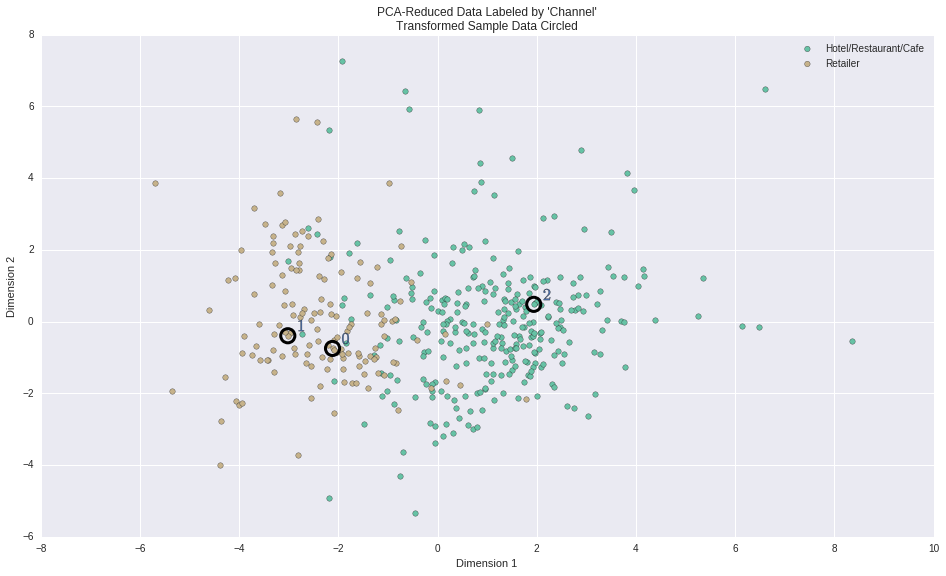

In [35]:
# Display the clustering results based on 'Channel' data
outliers = []
from visuals import channel_results
channel_results(reduced_data, outliers, pca_samples)

In [54]:
#print preds
#print len(preds)
#print reduced_data
full_data = pd.read_csv("customers.csv")
#print full_data
channels = full_data['Channel']

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print 'accuracy score: %6.4f' % accuracy_score(channels-1, -(preds-1))
print 'confusion matrix:'
print confusion_matrix(channels-1, -(preds-1))
print 'classification report: '
print classification_report(channels-1, -(preds-1))

accuracy score: 0.8909
confusion matrix:
[[256  42]
 [  6 136]]
classification report: 
             precision    recall  f1-score   support

          0       0.98      0.86      0.91       298
          1       0.76      0.96      0.85       142

avg / total       0.91      0.89      0.89       440



### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The number of cluster, 2, that was determined based on optimal silhouette score during the clustering analysis matches the number of underlying categories (Hotel/Restaurant/Cafe and Retailers). 

The clustering algorithm distinguished correctly between the two categories for majority of examples. More specifically the overall Segment 0 / Segment 1 classification that came out of our analysis follows the underlying distribution between Retailers and Hotels/Restaurants/Caffes pretty accurately, with the accuracy, and f1 score of 0.89, assuming Segment 0 establishments correspond to Hotels/Restaurants/Caffes and Segment 1 corresponds to Hotels. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.